In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pickle
import pandas as pd
from tqdm import tqdm
import seaborn as sns

from graspy.plot import heatmap

from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.mgc import MGC

from simulations import rho_ER_marg, rho_sbm_marg, rho_sbm_diff_block
from utils import sbm_params, pearson_power, identity, to_distance_mtx, to_kernel

In [4]:
rho_arr = np.around(np.linspace(-0.4, 0.9, 14), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.7, b=0.3)
k = 2
n = 100
mc = 500
sbm_ts_dict1 = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for name in test_names:
    if name == 'pearson':
        indept_test = RVCorr(which_test='pearson')
    elif name == 'dcorr':
        indept_test = DCorr(compute_distance_matrix=identity)
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=to_distance_mtx(A),
                matrix_Y=to_distance_mtx(B))
            sbm_ts_dict1[name][i, j] = test_stat_alt

14it [00:38,  2.69s/it]
14it [00:17,  1.25s/it]


In [7]:
rho_arr = np.around(np.linspace(-0.4, 0.9, 14), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.7, b=0.3)
k = 2
n = 500
mc = 500
sbm_ts_dict = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for name in test_names:
    if name == 'pearson':
        indept_test = RVCorr(which_test='pearson')
    elif name == 'dcorr':
        indept_test = DCorr(compute_distance_matrix=identity)
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=to_distance_mtx(A),
                matrix_Y=to_distance_mtx(B))
            sbm_ts_dict[name][i, j] = test_stat_alt

14it [06:58, 30.22s/it]
14it [05:14, 22.22s/it]


In [22]:
rho_arr = np.around(np.linspace(-0.4, 0.9, 14), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.7, b=0.3)
k = 2
n = 500
mc = 500
indept_test = DCorr(compute_distance_matrix=identity)
sbm_ts_dict2 = {'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['dcorr']

for name in test_names:
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=to_distance_mtx(to_kernel(A)),
                matrix_Y=to_distance_mtx(to_kernel(B)))
            sbm_ts_dict2[name][i, j] = test_stat_alt

14it [07:07, 30.16s/it]


Text(0.5, 1.0, 'rho sbm, same marginal: 0.7, 0.3')

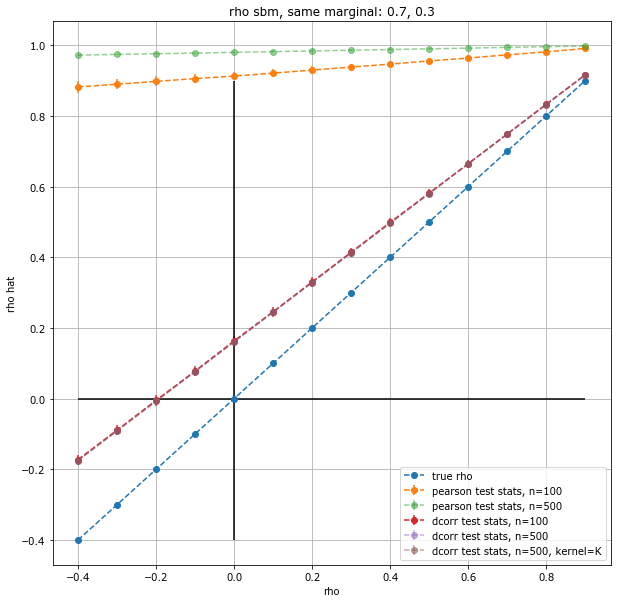

In [28]:
plt.figure(figsize=(10,10))
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
test_names = ['pearson', 'dcorr']
for name in test_names:
    plt.errorbar(rho_arr, np.mean(sbm_ts_dict1[name], axis=1), yerr=np.std(sbm_ts_dict1[name], axis=1),
             marker='o', linestyle='--', label='{} test stats, n=100'.format(name))
    plt.errorbar(rho_arr, np.mean(sbm_ts_dict[name], axis=1), yerr=np.std(sbm_ts_dict[name], axis=1),
             marker='o', linestyle='--', label='{} test stats, n=500'.format(name), alpha=0.5)
plt.errorbar(rho_arr, np.mean(sbm_ts_dict2['dcorr'], axis=1), yerr=np.std(sbm_ts_dict['dcorr'], axis=1),
            marker='o', linestyle='--', label='dcorr test stats, n=500, kernel=K', alpha=0.5)

plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()
plt.title('rho sbm, same marginal: 0.7, 0.3')

In [4]:
rho_arr = np.around(np.linspace(-0.6, 0.3, 10), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.2, b=0.5)
k = 2
n = 100
mc = 500
sbm_marg_ts_dict = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for name in test_names:
    if name == 'pearson':
        indept_test = RVCorr(which_test='pearson')
    elif name == 'dcorr':
        indept_test = DCorr(compute_distance_matrix=identity)
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=to_distance_mtx(A),
                matrix_Y=to_distance_mtx(B))
            sbm_marg_ts_dict[name][i, j] = test_stat_alt

10it [00:25,  2.60s/it]
10it [00:12,  1.23s/it]


In [14]:
rho_arr = np.around(np.linspace(-0.6, 0.3, 10), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.2, b=0.5)
k = 2
n = 500
mc = 500
sbm_marg_ts_dict1 = {'pearson': np.zeros((rho_arr.size, mc)),
          'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['pearson', 'dcorr']

for name in test_names:
    if name == 'pearson':
        indept_test = RVCorr(which_test='pearson')
    elif name == 'dcorr':
        indept_test = DCorr(compute_distance_matrix=identity)
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=to_distance_mtx(A),
                matrix_Y=to_distance_mtx(B))
            sbm_marg_ts_dict1[name][i, j] = test_stat_alt

10it [04:48, 29.22s/it]
10it [03:38, 22.02s/it]


Text(0.5, 1.0, 'sbm different marginal: P1=[0.7, 0.3], P2=[0.2, 0.5]')

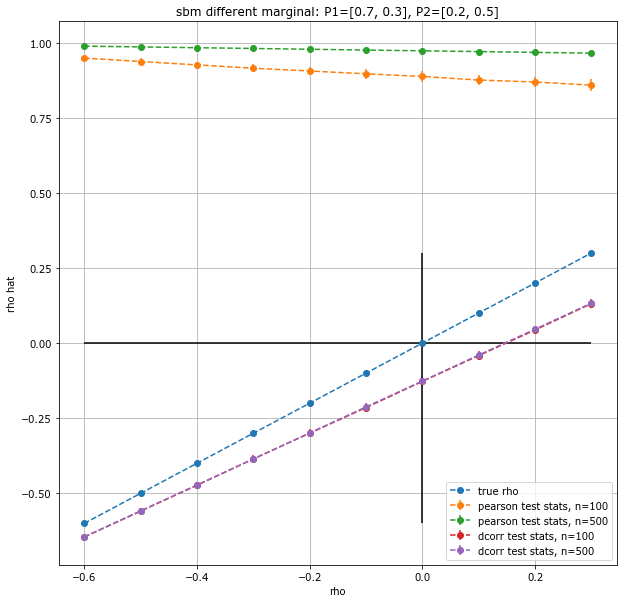

In [30]:
plt.figure(figsize=(10,10))
rho_arr = np.around(np.linspace(-0.6, 0.3, 10), 1)
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
for name in test_names:
    plt.errorbar(rho_arr, np.mean(sbm_marg_ts_dict[name], axis=1), yerr=np.std(sbm_marg_ts_dict[name], axis=1),
             marker='o', linestyle='--', label='{} test stats, n=100'.format(name))
    plt.errorbar(rho_arr, np.mean(sbm_marg_ts_dict1[name], axis=1), yerr=np.std(sbm_marg_ts_dict1[name], axis=1),
             marker='o', linestyle='--', label='{} test stats, n=500'.format(name))
plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()
plt.title('sbm different marginal: P1=[0.7, 0.3], P2=[0.2, 0.5]')

In [5]:
def new_distance(A):
    distance_mtx_A = 1 - (A / np.max(A))
    return distance_mtx_A

In [7]:
rho_arr = np.around(np.linspace(-0.4, 0.9, 14), 1)
P1 = sbm_params(a=0.7, b=0.3)
P2 = sbm_params(a=0.7, b=0.3)
k = 2
n = 100
mc = 500
indept_test = DCorr(compute_distance_matrix=identity)
sbm_ts_dict3 = {'dcorr': np.zeros((rho_arr.size, mc))}
test_names = ['dcorr']

for name in test_names:
    for i, rho in tqdm(enumerate(rho_arr)):
        for j in range(mc):
            A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)
            test_stat_alt, _ = indept_test.test_statistic(
                matrix_X=new_distance(A),
                matrix_Y=new_distance(B))
            sbm_ts_dict3[name][i, j] = test_stat_alt

14it [00:18,  1.28s/it]


Text(0.5, 1.0, 'rho sbm, same marginal: 0.7, 0.3')

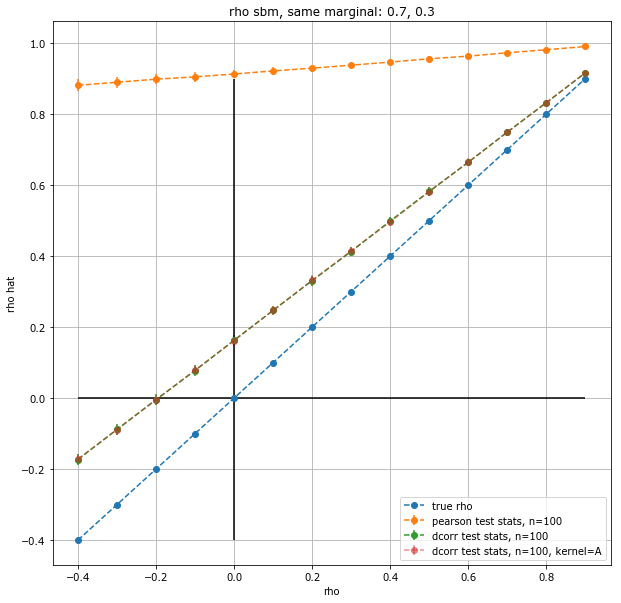

In [9]:
plt.figure(figsize=(10,10))
plt.plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle='--')
test_names = ['pearson', 'dcorr']
for name in test_names:
    plt.errorbar(rho_arr, np.mean(sbm_ts_dict1[name], axis=1), yerr=np.std(sbm_ts_dict1[name], axis=1),
             marker='o', linestyle='--', label='{} test stats, n=100'.format(name))
plt.errorbar(rho_arr, np.mean(sbm_ts_dict3['dcorr'], axis=1), yerr=np.std(sbm_ts_dict3['dcorr'], axis=1),
            marker='o', linestyle='--', label='dcorr test stats, n=100, kernel=A', alpha=0.5)

plt.hlines(y=0, xmin=np.amin(rho_arr), xmax=np.amax(rho_arr))
plt.vlines(x=0, ymin=np.amin(rho_arr), ymax=np.amax(rho_arr))
plt.grid()
plt.xlabel('rho')
plt.ylabel('rho hat')
plt.legend()
plt.title('rho sbm, same marginal: 0.7, 0.3')

In [10]:
A, B = rho_sbm_marg(rho=rho, AL=P1, BL=P2, k=k, n=n)

In [12]:
new_distance(A)

array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 0., 1.]])